In [197]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [198]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [199]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])

df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


Text(0, 0.5, 'income')

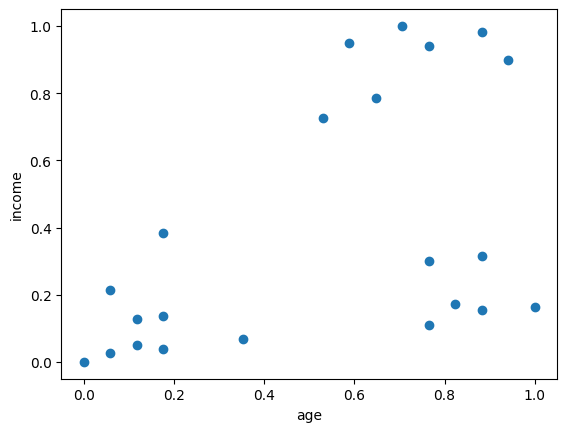

In [200]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('age')
plt.ylabel('income')

In [201]:
km = KMeans(n_clusters=3)
y_p = km.fit_predict(df[['Age','Income($)']])
y_p

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [202]:
df['Predicted'] = y_p
df.head()

,Name,Age,Income($),Predicted
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [203]:
print(km.cluster_centers_.shape)
km.cluster_centers_

(3, 2)


array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [204]:
df1 = df[df['Predicted']==0]
df2 = df[df['Predicted']==1]
df3 = df[df['Predicted']==2]

[0.85294118 0.1372549  0.72268908]


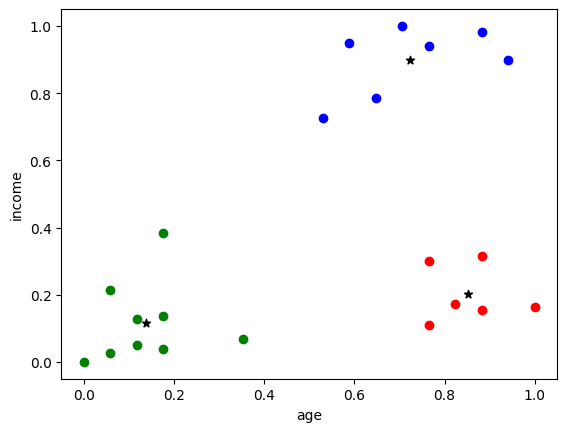

In [205]:
plt.scatter(df1['Age'],df1['Income($)'],c='red')
plt.scatter(df2['Age'],df2['Income($)'],c='green')

plt.scatter(df3['Age'],df3['Income($)'],c='blue')
plt.xlabel('age')
plt.ylabel('income')
print(km.cluster_centers_[:,0])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='black',marker='*')

In [206]:
sse = []
k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [207]:
sse

[5.434011511988178,
 2.4571335359046356,
 0.4750783498553096,
 0.368773407644059,
 0.28607171066894405,
 0.2671557284269111,
 0.1954141081991318,
 0.17025056972895086,
 0.13901964618035362]

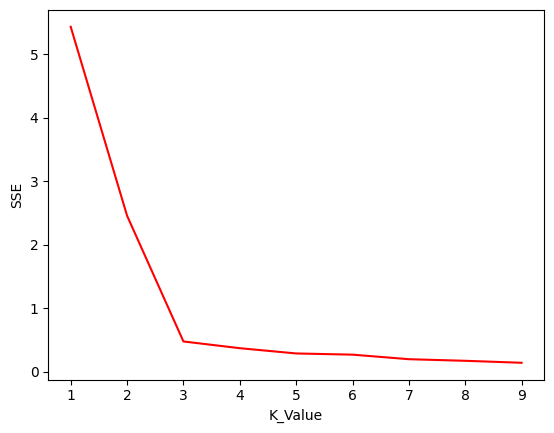

In [208]:
plt.xlabel('K_Value')
plt.ylabel('SSE')

plt.plot(k_rng,sse,c='red')